In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np


db = mysql.connector.connect(host = 'localhost', 
                             username = 'root',
                             password = 'Ghanashyam&7500',
                             database = 'ecommerce')

cur = db.cursor()

# # Calculate the number of orders per month in 2018.


<function matplotlib.pyplot.show(close=None, block=None)>

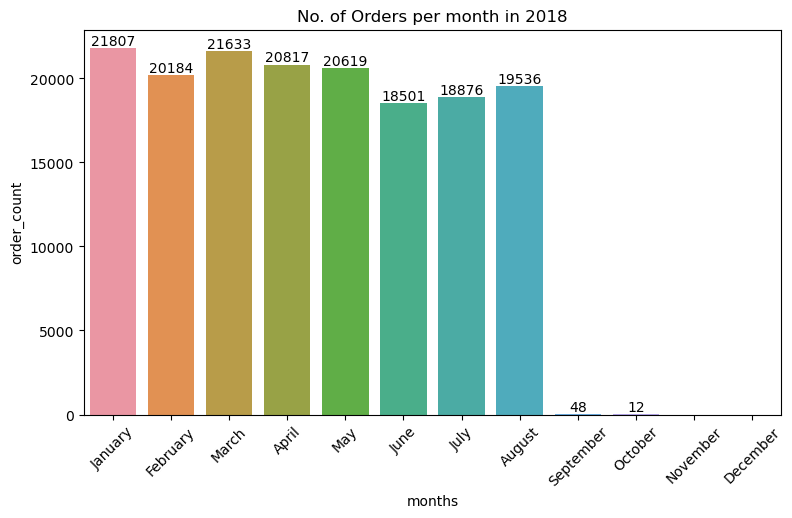

In [47]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
#df = df.sort_values(by = "months", ascending = False)
o = ["January", "February","March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize = (9,5))
ax = sns.barplot(x = df["months"], y =df["order_count"], data = df, order = o)
plt.title("No. of Orders per month in 2018")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.show

# # Find the average number of products per order, grouped by customer city.

In [59]:
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as avg_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["city","Average_orders"])
df

,city,Average_orders
0,sao jose dos campos,10.25
1,indaial,10.04
2,treze tilias,11.45
3,sao paulo,10.41
4,rio de janeiro,10.32
...,...,...
4105,sambaiba,9.00
4106,guairaca,18.00
4107,japaratuba,9.00
4108,tuiuti,9.00


# Calculate the percentage of total revenue contributed by each product category.

In [8]:
query = """ select (products.product_category) category, round((sum(payments.payment_value) / (select sum(payment_value) from payments)*100),2) as sales_percentage
from products join order_items
on order_items.product_id = products.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc;
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category","sales_percentage"])
df

,category,sales_percentage
0,bed table bath,96.28
1,HEALTH BEAUTY,93.18
2,computer accessories,89.13
3,Furniture Decoration,80.40
4,Watches present,80.35
...,...,...
69,PC Gamer,0.12
70,House Comfort 2,0.10
71,cds music dvds,0.07
72,Fashion Children's Clothing,0.04


# Identify the correlation between product price and the number of times a product has been purchased.


In [22]:
query = """ select (products.product_category) as category , count(order_items.product_id) total_count, round(avg(order_items.price),2)
from products join
order_items
on products.product_id = order_items.product_id
group by category;
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category","total_count", "avg_price"])

arr1 = df['total_count']
arr2 = df['avg_price']

corrleation = np.corrcoef([arr1,arr2])
print("The correlation between price and number of times a product has been puchased is                                        ", corrleation)

The correlation between price and number of times a product has been puchased is                                         [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


# Calculate the total revenue generated by each seller, and rank them by revenue.


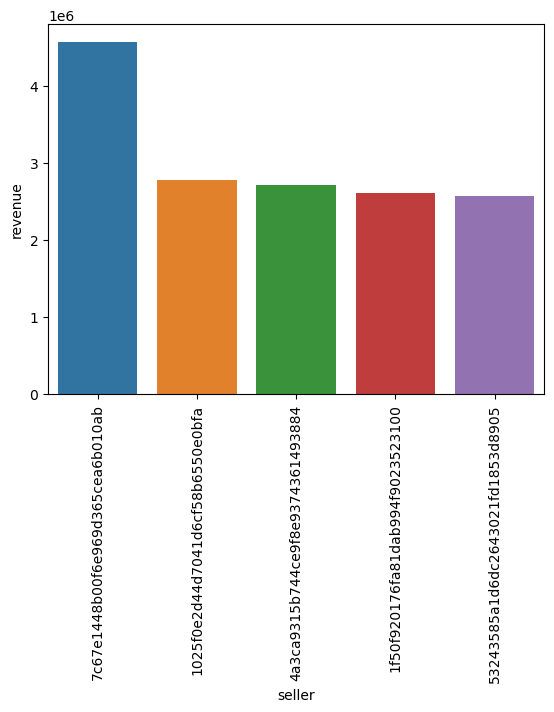

In [31]:
query = """ select *, dense_rank() over (order by revenue desc) as rn
from
(select order_items.seller_id as seller, round(sum(payments.payment_value),2) as revenue
from order_items
join payments
on order_items.order_id = payments.order_id
group by seller) as a;
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller","revenue", "rn"])
df = df.head()
sns.barplot(x = "seller", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()
